__Explanation of the dataset__

Variables:
ORDER: Sequence of clicks during one session

COUNTRY: 
1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (.biz) 44-com (.com)
45-int (.int) 46-net (.net)
47-org (*.org)

SESSION ID: variable indicating session id (short record)

PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product
(217 products)

COLOUR -> colour of product
1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

LOCATION -> photo location on the page, the screen has been divided into six parts:
1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

MODEL PHOTOGRAPHY -> variable with two categories:
1-en face
2-profile

PRICE -> price in US dollars

PRICE 2 -> variable informing whether the price of a particular product is higher than
the average price for the entire product category
1-yes
2-no


In [1]:
import pandas as pd
import numpy as nu
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('clicks.csv', sep =";")
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2020,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2020,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2020,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2020,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2020,4,1,5,29,1,2,B8,4,3,2,52,1,1


* All columns described in the documentation except of __"page"__ column (the last one)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

* Data doesn't contain any null values. 
* All columns have an integer type except "page 2"

In [3]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2020.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2020.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2020.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2020.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2020.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2020.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


* There are no outliers in the numerical data. 
* All sales data is from 2020 year from April to August.
* No outliers in the categorical data.

In [4]:
# checking the duplicates 
df.shape
duplicate_rows_data = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 14)


* No duplicate values.

In [5]:
#counting unique values
uniqueValues = df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
year                           1
month                          5
day                           31
order                        195
country                       47
session ID                 24026
page 1 (main category)         4
page 2 (clothing model)      217
colour                        14
location                       6
model photography              2
price                         20
price 2                        2
page                           5
dtype: int64


In [6]:
#renaming the columns with spaces
df.rename(columns={'page 1 (main category)': 'page1', 'page 2 (clothing model)': 'page2', 'session ID': 'sessionID', 'price 2': 'price2'}, inplace=True)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'order'}>],
       [<AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'sessionID'}>,
        <AxesSubplot:title={'center':'page1'}>,
        <AxesSubplot:title={'center':'colour'}>],
       [<AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'model photography'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'price2'}>],
       [<AxesSubplot:title={'center':'page'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

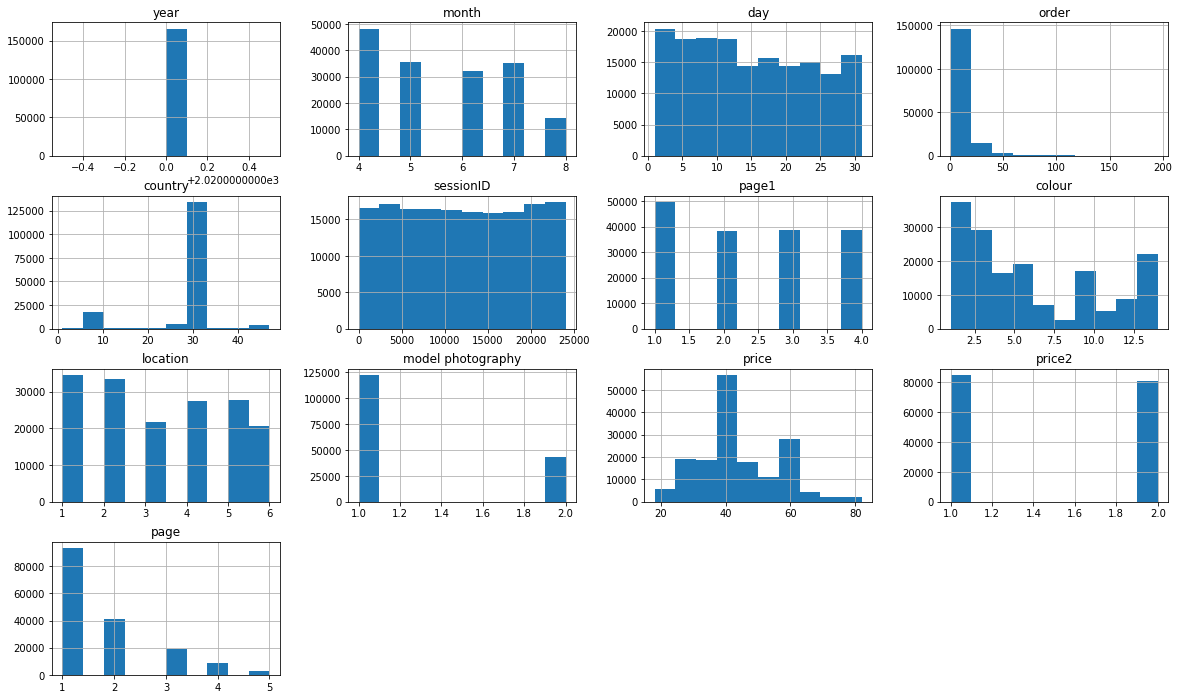

In [7]:
# plotting the data of type int
int_attributes = df.select_dtypes(include=['int64'])
int_attributes.hist(figsize=(20,12))

* The most popular order of clicks are from 1 to approx. 25
* Most of the data comes from several countries
* The most popular colors are from 1 to 3
* Most of the photos of the items are "en face"
* There are 2 peaks in items prices. One around 40 another 60. Could be "usual" and "limited" collections

In [8]:
pd.crosstab(df["country"], df["page1"], margins = True)

page1,1,2,3,4,All
country,,,,,
1,0,0,1,2,3
2,18,18,17,5,58
3,40,24,91,101,256
4,0,1,0,0,1
5,2,0,1,1,4
6,0,4,1,0,5
7,2,2,5,0,9
8,0,0,1,0,1
9,8262,4103,5531,107,18003


* Countries 9, 24, and 29 have the most items of the dataset
* In country 9 type 1 is the largest, in country 24 as well, in country 29 all item types are evently disctributed
* 9-Czech Republic, 24-Lithuania, 29-Poland
* 1-trousers, 2-skirts, 3-blouses, 4-sale
* Thus, in CR and Lithuania trousers are more clicked, in Poland all items are clicked evenly
 

<AxesSubplot:xlabel='price-bin', ylabel='count'>

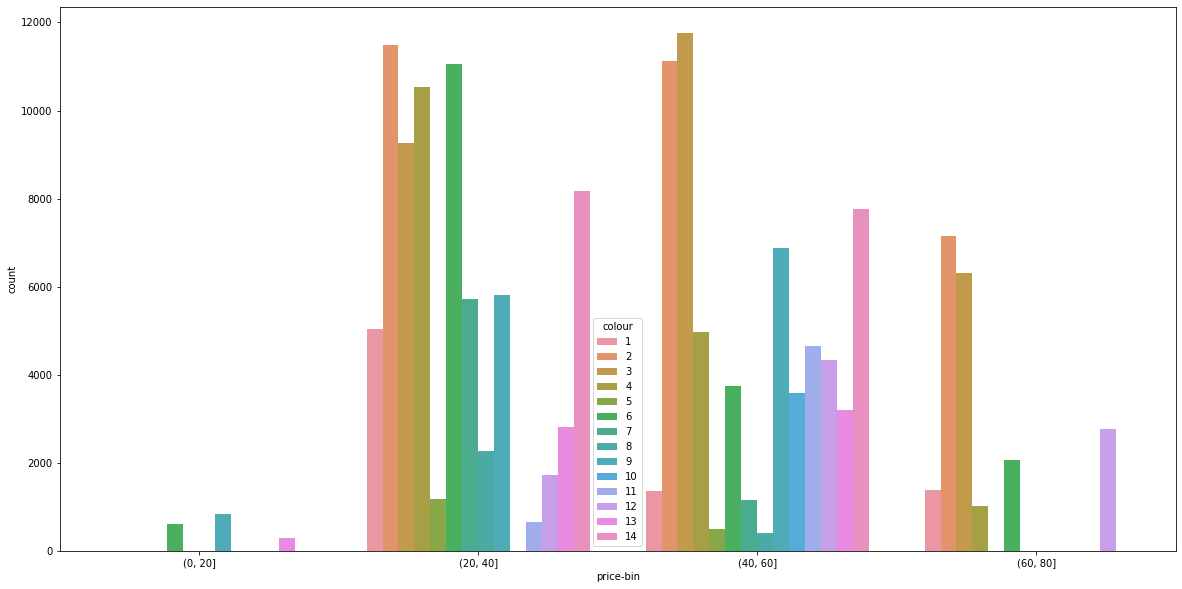

In [9]:
Mondf['price-bin'] = pd.cut(df['price'], [0,20,40,60,80])

fig = plt.figure(figsize=(20,10))
sns.countplot(x='price-bin', hue = 'colour', data = df)

* Colours with code numbers 2,3 are the most clickable
* When the price range is from 0 to 20, items seem to not be very popular
* Colours 6 and 14 are very clickable when the price range is from 20 to 40
* Colours 10 and 14 are very clickable when the price range is from 40 to 60
* The most expensive items as well popular in colours of 2 and 3

In [10]:
#Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from tensorflow import keras 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#building decision tree to predict order of clicks
feature_cols = ['price', 'colour', 'location','page1','model photography' ]
X = df[feature_cols] # Features
y = df.order # Target variable

In [12]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [13]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
#checking the model accuracy
print("Accuracy Decision Trees:",metrics.accuracy_score(y_test, y_pred))

Accuracy Decision Trees: 0.14692907358539975


In [15]:
# Saving the model
import pickle

pickle.dump(clf, open('clicks_clf.pkl', 'wb'))

In [16]:
!pip install pydotplus==2.0.2

     |████████████████████████████████| 278 kB 15.1 MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=2fc59d530a266dc9d5d3bbfb90066c02c291ae55bb400ef668893fc2a2333d90
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('orders.png')
Image(graph.create_png())

##### TODO:
1. Reduce the target variable to 23 (now we have 195) ✅
2. Train the decision tree again on new amount of feature values of the target (order).
3. Train the random forest model. ✅
4. Create some graphs for the dashboard (static images from PowerBI + explanations).
5. Create the dashboard (Mykola). 
6. Create the presentation.

In [18]:
# Reduce target variable to 23
#display(df['order'].value_counts()[:23].sort_values(ascending=False)) #proof 1-23 are the target vars

df_copy = df[df['order'] < 24]
display(df.tail(5))

,year,month,day,order,country,sessionID,page1,page2,colour,location,model photography,price,price2,page,price-bin
165469,2020,8,13,1,29,24024,2,B10,2,4,1,67,1,1,"(60, 80]"
165470,2020,8,13,1,9,24025,1,A11,3,4,1,62,1,1,"(60, 80]"
165471,2020,8,13,1,34,24026,1,A2,3,1,1,43,2,1,"(40, 60]"
165472,2020,8,13,2,34,24026,3,C2,12,1,1,43,1,1,"(40, 60]"
165473,2020,8,13,3,34,24026,2,B2,3,1,2,57,1,1,"(40, 60]"


In [19]:
#Random Forest Model 
# redefine everything after 23
feature_cols = ['price', 'colour', 'location','page1','model photography' ]
X = df_copy[feature_cols]
y = df_copy.order 

# 80-20 training-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_cl = RandomForestClassifier(n_estimators=100)
rf_cl = rf_cl.fit(X_train,y_train)
y_pred_rf = rf_cl.predict(X_test)

# model accuracy
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy Random Forest: 0.16326870544340064


In [20]:
#Computing Ada Boost Classifier to predict order of clicks
feature_cols = ['price', 'colour', 'location', 'page1']
X = df_copy[feature_cols] # Features
y = df_copy.order # Target variable

#70-30 training-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=2)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

#model accuracy
print("Accuracy Ada Boost Classifier:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy Ada Boost Classifier: 0.1599964464975792


In [23]:
#Computing KNeighbours Algorithm to predict order of clicks
feature_cols = ['price', 'colour', 'location', 'page1', 'model photography']
X = df_copy[feature_cols] # Features
y = df_copy.order # Target variable

#70-30 training-test ratio
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
y_pred_kNeighbours = knn.predict(X_test)

#model accuracy
print("Accuracy KNeighbours:",metrics.accuracy_score(y_test, y_pred_kNeighbours))

Accuracy KNeighbours: 0.13603251454715054


In [24]:
#Computing Linear Discriminant Analysis to predict order of clicks
feature_cols = ['price', 'colour', 'location', 'page1', 'model photography']
X = df_copy[feature_cols] # Features
y = df_copy.order # Target variable

#70-30 training-test ratio
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state=42)
linDiscAnalysis = LinearDiscriminantAnalysis()
linDiscAnalysis.fit(X_train, y_train)
y_pred_linDiscAna = linDiscAnalysis.predict(X_test)

#model accuracy 
print("Accuracy Linear Discriminant Analysis:",metrics.accuracy_score(y_test, y_pred_linDiscAna))

Accuracy Linear Discriminant Analysis: 0.15950783991471595


In [28]:
## ANN model
df= df[df['order'] < 24]

feature_cols = ['price', 'colour', 'location','page1','model photography' ]
loc = df.columns.get_loc
X = df.iloc[:, np.r_[loc('page1'), loc('colour'):loc('price')+1]].values
y = df.iloc[:, 3].values

#Encoding independent vars
ohe = OneHotEncoder(sparse=False)
targets = np.array([[0, 1, 2, 3, 4]]).reshape(-1)
X = ohe.fit_transform(X)[:, targets]
display(X)

#Train-test split, 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
display(X_test.shape[1])

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#ANN
classifier = Sequential()
classifier.add(Dense(1000, activation='relu', input_dim=5)) #input layer + hidden layer
classifier.add(Dense(500, activation='relu'))# additional hidden layer
classifier.add(Dense(100, activation='relu'))# additional hidden layer
classifier.add(Dense(50, activation='relu'))# additional hidden layer
classifier.add(Dense(y_test.shape[1], activation='softmax')) #output layer

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train, y_train)
y_pred_ann = classifier.predict(X_test)
# Accuracy ANN
#print("Accuracy ANN:",metrics.accuracy_score(y_test, y_pred_ann))

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

5

3753/3753 [==============================] - 54s 14ms/step - loss: 2.7723 - accuracy: 0.1588


In [29]:
# PCA
feature_cols = ['price', 'colour', 'location','page1','model photography']
X = df[feature_cols]
y = df.order

#Scaling of X
sc = StandardScaler()
X=sc.fit_transform(X)

#Initialize PCA
pca=PCA(n_components=5)
X=pca.fit_transform(X)

#Train-test split, 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_pca = lr.predict(X_test)

#Accuracy
print("Accuracy PCA:",metrics.accuracy_score(y_test, y_pred_pca))

Accuracy PCA: 0.1607702045439403


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eca1cb58-52ce-4ebe-9e88-ee0d251926b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>